<h3>Ensure that you are connected to a GPU. You may use the T4 GPU if you are on running this notebook on Google colab

Important : Please run the cells in the enviroment setup section before proceeding to any other sections. Failure to do this will result in the other sections unable to function!</h3>




# <b>Enviroment Setup Section<b>
<h5> Please run the cell in the enviroment setup before proceeding to run any of the other sections. Simply click on the play button below and ensure all cells have been ran <h5>

In [1]:
!pip install opencv-python-headless
import os
import cv2
from tqdm import tqdm
from ipywidgets import interact, widgets
from IPython.display import display, HTML
from base64 import b64encode
from moviepy.editor import VideoFileClip
import subprocess


!git clone https://github.com/YUyou0/ict3104-team14-2023.git

!sudo apt-get install python3.8
!sudo apt-get install python3.8-distutils
!sudo apt-get update
!python --version
!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

!cd /content/ict3104-team14-2023
!export PYTHONPATH=/content/FollowYourPose:$PYTHONPATH
# %pip install -r requirements.txt
!python3.8 -m pip install -q -U --pre triton
!apt update
!python3.8 -m pip install -q diffusers==0.11.1 torch==1.13.1 transformers==4.26.0 bitsandbytes==0.35.4 \
imageio-ffmpeg xformers==0.0.16  --extra-index-url https://download.pytorch.org/whl/cu113

%cd /content/ict3104-team14-2023/
!python3.8 -m pip install -r requirements.txt

Cloning into 'ict3104-team14-2023'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 170 (delta 0), reused 3 (delta 0), pack-reused 164
Receiving objects: 100% (170/170), 70.16 MiB | 38.67 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support
  python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3.8
  python3.8-minimal
0 upgraded, 6 newly installed, 0 to remove and 18 not upgraded.
Need to get 5,098 kB of archives.
After this operation, 18.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3

In [2]:
%mkdir checkpoints
!git lfs install
!git clone https://huggingface.co/YueMafighting/FollowYourPose_v1
%mv /content/ict3104-team14-2023/FollowYourPose_v1/* /content/ict3104-team14-2023/checkpoints/
%rm -rf FollowYourPose_v1

!sudo apt-get install python3.8
!sudo apt-get install python3.8-distutils

Updated git hooks.
Git LFS initialized.
Cloning into 'FollowYourPose_v1'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), 584.62 KiB | 5.62 MiB/s, done.
Filtering content: 100% (9/9), 9.75 GiB | 44.98 MiB/s, done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8 is already the newest version (3.8.18-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8-distutils is already the newest version (3.8.18-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


# <b>Data Exploration Section<b>

<h5>This section allows you to create new data folders and upload videos for those folders as well. These data folders will be used throughout other sections of this notebook. You can also watch those uploaded videos in this section. Please follow the steps carefully and accordingly<h5>

<h3><b>Step 1 : Select a data folder</b>

Run this cell and select a data folder that you want to inspect from the dropdown menu  <h3>

In [ ]:
%cd /content/ict3104-team14-2023/

# Define the directory path you want to select folders from
directory_path = 'input_videos'  # Replace with your directory path

# Get a list of subdirectories in the specified directory
subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

# Add empty as the first item to represent no selection initially
if subdirectories[0] != "":
    subdirectories.insert(0, "")

# Create a dropdown widget
folder_dropdown = widgets.Dropdown(
    options=subdirectories,
    description='Select folder:',
)

# Function to handle folder selection
def on_folder_selected(change):
    global selected_folder
    selected_folder = change.new
    print(f'Selected folder: {selected_folder}')

# Attach the event handler to the dropdown's value change
folder_dropdown.observe(on_folder_selected, names='value')

# Display the dropdown
display(folder_dropdown)

/content/ict3104-team14-2023


Dropdown(description='Select folder:', options=('', 'charades', 'dances', '.ipynb_checkpoints'), value='')

Selected folder: dances


<h3><b>Step 2 : Watch a video from the data folder</b>

Run this cell and select a video from the dropdown menu below to view it. The videos in the list are the videos that are in that data folder <h3>

In [ ]:
video_dir = f'/content/ict3104-team14-2023/input_videos/{selected_folder}'

video_files = [f for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mkv'))]

# Add empty as the first item to represent no selection initially
if video_files[0] != "":
    video_files.insert(0, "")

# Create a dropdown widget to select an item
item_dropdown = widgets.Dropdown(options=video_files, description=" ")  # hardcoded spacing

# Define a function that will run based on the selected item
def run_function(selected_item):
    if selected_item != "":
      print(" ") # hardcoded spacing

      # Construct the path to the selected video
      video_path = os.path.join(video_dir, selected_item)

      # Display the selected video using the display_video function
      display(display_video(video_path, width=1080, height=640, autoplay=True, loop=True, controls=True))

# Configure video display widget settings
def display_video(video_path, width=640, height=360, autoplay=True, loop=True, controls=True):
    video_file = open(video_path, "rb").read()
    video_url = "data:video/mp4;base64," + b64encode(video_file).decode()
    video_tag = f'<video width="{width}" height="{height}" autoplay={"autoplay" if autoplay else ""} loop={"loop" if loop else ""} {"controls" if controls else ""}><source src="{video_url}" type="video/mp4"></video>'
    return HTML(data=video_tag)

# function to get video duration
def get_video_duration(video_path):
    try:
        video = VideoFileClip(video_path)
        duration = video.duration
        return duration
    except Exception as e:
        print(f"Error: {e}")
        return None

# Iterate through video files to collect information
def collect_information():
    for video_file in video_files:
        if video_file != "":
            video_path = os.path.join(video_dir, video_file)
            file_size = os.path.getsize(video_path)
            duration = get_video_duration(video_path)
            if duration is not None:
                print(f"Filename: {video_file}\t Size (bytes): {file_size} bytes\t Duration (seconds): {duration} seconds")
            else:
                print(f"Unable to determine video duration for {video_file}")

print(f"Files in Data folder : {selected_folder}\n")
# get basic information to display as list
collect_information()
print("Select a video to play:")

# Create an interactive widget that triggers the function when an item is selected
item_dropdown.value = "" # hardcoded default setting
interactive_widget = widgets.interactive(run_function, selected_item=item_dropdown)

# Display the interactive widget
display(interactive_widget)

Files in Data folder : charades

Filename: 5D3X6.mp4	 Size (bytes): 1997096 bytes	 Duration (seconds): 17.28 seconds
Filename: 5O0YS.mp4	 Size (bytes): 2735755 bytes	 Duration (seconds): 20.81 seconds
Filename: 5EFQ7.mp4	 Size (bytes): 2654524 bytes	 Duration (seconds): 31.7 seconds
Filename: 2E8GU.mp4	 Size (bytes): 2928833 bytes	 Duration (seconds): 22.43 seconds
Filename: 3LMTS.mp4	 Size (bytes): 5105105 bytes	 Duration (seconds): 30.35 seconds
Filename: 8ASRQ.mp4	 Size (bytes): 1961188 bytes	 Duration (seconds): 18.21 seconds
Filename: 3JJ7C.mp4	 Size (bytes): 3196414 bytes	 Duration (seconds): 31.74 seconds
Filename: 0RJKT.mp4	 Size (bytes): 1863374 bytes	 Duration (seconds): 27.15 seconds
Filename: 52CKM.mp4	 Size (bytes): 2198189 bytes	 Duration (seconds): 33.9 seconds
Filename: 3IPI3.mp4	 Size (bytes): 1510774 bytes	 Duration (seconds): 18.0 seconds
Filename: 4GLAP.mp4	 Size (bytes): 2843331 bytes	 Duration (seconds): 30.51 seconds
Select a video to play:


interactive(children=(Dropdown(description=' ', options=('', '5D3X6.mp4', '5O0YS.mp4', '5EFQ7.mp4', '2E8GU.mp4…

<h3> <b>Step 3 (Optional) : Creating a new data folder</b>

Run this cell and give a name to this new data folder and click submit to create a new data folder <h3>

In [ ]:
# Function to create a new folder
def create_new_folder(_):
    folder_name = folder_name_input.value.strip()  # Get folder name from input widget
    if folder_name:
        folder_path = os.path.join('/content/ict3104-team14-2023/input_videos', folder_name)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
            output_widget.value = f"Folder '{folder_name}' created successfully."
        else:
            output_widget.value = f"Folder '{folder_name}' already exists."
    else:
        output_widget.value = "Please enter a valid folder name."

# Create a text input widget for folder name
folder_name_input = widgets.Text(
    placeholder='Enter folder name',
    description='Folder Name:',
    disabled=False
)

# Create a button widget to trigger folder creation
create_folder_button = widgets.Button(
    description='Create Folder',
    disabled=False,
    button_style='info',  # You can customize the button style
)

# Create an output widget for displaying messages
output_widget = widgets.Output()

# Connect the button click event to the folder creation function
create_folder_button.on_click(create_new_folder)

# Display the widgets
display(folder_name_input, create_folder_button, output_widget)

Text(value='', description='Folder Name:', placeholder='Enter folder name')

Button(button_style='info', description='Create Folder', style=ButtonStyle())

Output()

<h3><b>Step 4 : Upload a new video file to the data folder</b>

Run this cell to upload a new video. The video will be uploaded to the data folder selected in step 1. If you want to change which data folder the video will placed, please go back to running step 1, choose a different data folder, then run this cell again

In [ ]:
%cd /content/ict3104-team14-2023/input_videos/{selected_folder}

# Function to handle file upload
def handle_file_upload(change):
    uploaded_files = file_upload.value
    if uploaded_files:
        uploaded_file = list(uploaded_files.values())[0]
        file_name = uploaded_file['metadata']['name']
        with open(file_name, 'wb') as f:
            f.write(uploaded_file['content'])
        confirm_button.disabled = False
        output_widget.value = f"File '{file_name}' uploaded successfully."
    else:
        output_widget.value = "Please select a file to upload."

# Function to confirm upload
def confirm_upload(_):
    file_name = list(file_upload.value.keys())[0]
    output_widget.value = f"File '{file_name}' confirmed for upload."

# Create a file upload widget
file_upload = widgets.FileUpload(
    description='Upload Video:',
    accept='.mp4',  # Specify allowed file extensions if needed
    multiple=False  # Allow multiple file uploads if needed
)

# Create a confirm button (disabled by default)
confirm_button = widgets.Button(
    description='Confirm Upload',
    disabled=True,
    button_style='success'  # You can customize the button style
)

# Create an output widget for displaying messages
output_widget = widgets.Output()

# Connect the file upload change event to the file upload function
file_upload.observe(handle_file_upload, names='value')

# Connect the confirm button click event to the confirm upload function
confirm_button.on_click(confirm_upload)

# Display the widgets
display(file_upload, confirm_button, output_widget)

/content/ict3104-team14-2023/input_videos/dances


FileUpload(value={}, accept='.mp4', description='Upload Video:')

Button(button_style='success', description='Confirm Upload', disabled=True, style=ButtonStyle())

Output()

# <b>Inference Section<b>

<h5>This section allows you to create new AI generated gifs through the inputs of an extracted pose and an input validation prompt. You will also need to specify which config file to be used for the inferencing. Please follow the steps carefully and accordingly  <h5>

<h4> <b>Optional step : Check type of GPU and VRAM available <h4></b>

In [ ]:
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


<h3> <b>Step 1 : Select a pretrained model</b>

Run this cell to select the pretrained model that you want to use for inferencing.<h3>


In [ ]:
# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/configs'  # Replace with the actual folder path

# List files in the folder
model_list = os.listdir(folder_path)
model_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
model_dropdown = widgets.Dropdown(
    options=model_list,
    description='Select a file:'
)

# Display the dropdown widget
display(model_dropdown)

Dropdown(description='Select a file:', options=('', 'pose_sample.yaml'), value='')

<h3><b>Step 2 : Confirm your selected pretrained model</b>

Run this cell to confirm your selected pretrained model<h3>

In [ ]:
# Get the selected file name from the dropdown
selected_model = model_dropdown.value

# Check if the selected option is valid
if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Now 'selected_file' contains the selected file name as a string
print(f"Selected model: {selected_model}")

Selected model: pose_sample.yaml


<h3> <b>Step 3 : Select a pose</b>

Run this cell to select the pose that you want to use for inferencing.<h3>

In [ ]:
# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/pose_example'  # Replace with the actual folder path

# List files in the folder
pose_list = os.listdir(folder_path)
pose_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
pose_dropdown = widgets.Dropdown(
    options=pose_list,
    description='Select a file:'
)

# Display the dropdown widget
display(pose_dropdown)

Dropdown(description='Select a file:', options=('', 'vis_ikun_pose1.MOV', 'vis_ikun_pose2.mov'), value='')

<h3><b>Step 4 : Confirm your selected pose</b>

Run this cell to confirm your selected pose <h3>

In [ ]:
# Get the selected file name from the dropdown
selected_pose = pose_dropdown.value

# Check if the selected option is valid
if selected_pose == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Now 'selected_file' contains the selected file name as a string
print(f"Selected Pose: {selected_pose}")

Selected Pose: vis_ikun_pose2.mov


<h3><b>Step 5 : Input validation prompt(s)</b>

Run this cell and input a validation prompt.You may submit up to 3 validation prompts. The prompts you input will be used to creating new AI generated contents.  <h3>

In [ ]:
# Create a text input widget for the first validation prompt
text_input = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter the validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a text input widget for the second validation prompt
text_input2 = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter a validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a text input widget for the third validation prompt
text_input3 = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter a validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a submit button for the first validation prompt
submit_button = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a submit button for the second validation prompt
submit_button2 = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a submit button for the third validation prompt
submit_button3 = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a variable to store the first user's input
user_input = ''

# Create a variable to store the second user's input
user_input2 = ''

# Create a variable to store the third user's input
user_input3 = ''

# Define a function to update the user_input variable when the first submit button is clicked
def on_submit_button_click(b):
    global user_input
    user_input = text_input.value
    if user_input == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt 1 has been submitted : {user_input} ")

# Define a function to update the user_input variable when the second submit button is clicked
def on_submit_button_click2(b):
    global user_input2
    user_input2 = text_input2.value
    if user_input == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt 2 has been submitted : {user_input2} ")

# Define a function to update the user_input variable when the second submit button is clicked
def on_submit_button_click3(b):
    global user_input3
    user_input3 = text_input3.value
    if user_input == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt 3 has been submitted : {user_input3} ")


# Attach the click event handler to the first submit button
submit_button.on_click(on_submit_button_click)

# Attach the click event handler to the second submit button
submit_button2.on_click(on_submit_button_click2)

# Attach the click event handler to the second submit button
submit_button3.on_click(on_submit_button_click3)

# Display the widgets
display(text_input, submit_button)

# Display the widgets
display(text_input2, submit_button2)

# Display the widgets
display(text_input3, submit_button3)

Text(value='', description='Text Input:', placeholder='Enter the validation prompt')

Button(description='Submit', style=ButtonStyle())

Text(value='', description='Text Input:', placeholder='Enter a validation prompt')

Button(description='Submit', style=ButtonStyle())

Text(value='', description='Text Input:', placeholder='Enter a validation prompt')

Button(description='Submit', style=ButtonStyle())

<h3> <b>Step 6 : Confirm your validation prompt(s)</b>

Run this cell to confirm that your validation prompt(s) are correct <h3>

In [ ]:
print(f"Validation prompt 1 : {user_input}")
print(f"Validation prompt 2 : {user_input2}")
print(f"Validation prompt 3 : {user_input3}")

# Check if the selected option is valid
if (user_input == "") and (user_input2 == "") and (user_input3 == ""):
    raise ValueError("You have not written a validation prompt.")

Validation prompt 1 : 
Validation prompt 2 : 
Validation prompt 3 : 


ValueError: ignored

<h3><b>Step 7 : Update validation prompt(s) to configuration file</b>

Run this cell to submit the validation prompt(s) to the configuration file<h3>

In [ ]:
!pip install pyyaml
import yaml

config_file_path = '/content/ict3104-team14-2023/configs/pose_sample.yaml'
line_number = 6                   # Replace with the line number you want to update (zero-based index)
line_number2 = 7
line_number3 = 8

# Load the YAML file as a list of lines
with open(config_file_path, 'r') as file:
    lines = file.readlines()

if user_input != "":
  # Get user input for the new value for first validation prompt
  new_value1 = f"  - \"{user_input}\" "
  # Update the specific line in the list with the new value
  lines[line_number] = f"{new_value1}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

  # Load the YAML file as a list of lines
  with open(config_file_path, 'r') as file:
      lines = file.readlines()


if user_input2 != "":
  # Get user input for the new value for second validation prompt
  new_value2 = f"  - \"{user_input2}\" "
  # Update the specific line in the list with the new value
  lines[line_number2] = f"{new_value2}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

if user_input3 != "":
  # Get user input for the new value for second validation prompt
  new_value3 = f"  - \"{user_input3}\" "
  # Update the specific line in the list with the new value
  lines[line_number3] = f"{new_value3}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)




<h3><b>Step 8 : File verification and load execution command</b>

Run this file for final file checking and loading of execution command.<h3>

In [ ]:
if selected_model != "":
  print("Pretrained model loaded successful")
  print(selected_model)

print("\n")

if selected_pose != "":
   print("Stickman pose loaded successful")
   print(selected_pose)

print("\n")

if user_input != "":
   print("Validation prompt(s) loaded successful")
   print(user_input)
   print(user_input2)
   print(user_input3)

print("\n")

if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Check if the selected option is valid
if selected_pose == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Check if the selected option is valid
if (user_input == "") and (user_input2 == "") and (user_input3 == "") :
    raise ValueError("You have not written a validation prompt.")


command = f"TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config=\"configs/{selected_model}\" --skeleton_path=\"./pose_example/{selected_pose}\""
print(command)

Pretrained model loaded successful
pose_sample.yaml


Stickman pose loaded successful
vis_ikun_pose2.mov


Validation prompt(s) loaded successful
Spiderman
Batman
Captain America


TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config="configs/pose_sample.yaml" --skeleton_path="./pose_example/vis_ikun_pose2.mov"


<h3> <b>Step 9 : Start inferencing process</b>

Run this cell below to start the inferencing execution. The output gifs will be saved in checkpoints/inference. You can view and download them after the process has been completed in checkpoints/inference <h3>

In [ ]:
%cd /content/ict3104-team14-2023
!pwd
!{command}

/content/ict3104-team14-2023
/content/ict3104-team14-2023
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: module 'triton.language' has no attribute 'constexpr'
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvisi

# <b>Pose Extraction Section<b>

<h5>This section allows you to select a video and extract the pose skeleton from it.The videos in the list will be from the selected data folder from the data-exploration section.If you wish to select a video from a different data folder, please rerun step 1 of the data-exploration section and select your desired data folder<h5>

<h3><b>Step 1 : Setting up libraries and enviroment</b>

Run this cell to set up the necessary libraries and enviroment for the pose extraction<h3>

In [ ]:
%cd /content/ict3104-team14-2023/

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.2

def poseDetector(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]

    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()

    return frame

/content/ict3104-team14-2023


<h3><b>Step 2 : Select a video for pose extraction</b>

Run this cell and select which video you want to perform pose extraction. If you wish to select a vuideo from a different data folder, please rerun data-exploration step 1<h3>

In [ ]:
# Specify the folder path where you want to list files
folder_path = f'/content/ict3104-team14-2023/input_videos/{selected_folder}'  # Change this to your desired folder path

# Get a list of files in the folder
file_list = os.listdir(folder_path)
file_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget with file options
file_dropdown = widgets.Dropdown(
    options=file_list,
    description='Select a file:',
)

# Display the dropdown widget
display(file_dropdown)

# Function to handle file selection
def select_file(change):
    global selected_file
    selected_file = change.new
    print(f"Selected file: {selected_file}")
    # Store the selected file name in a variable or use it as needed
    # For example, you can assign it to a variable like this:
    # selected_file_name = selected_file

# Attach the select_file function to the dropdown's observe method
file_dropdown.observe(select_file, names='value')

Dropdown(description='Select a file:', options=('', 'raheem_dance.mp4'), value='')

Selected file: raheem_dance.mp4


<h3><b>Step 3 : Run the pose extraction process</b>

Run this cell to start the pose extraction process. The output will released to the pose_example folder<h3>

In [ ]:
%cd /content/ict3104-team14-2023/input_videos/{selected_folder}/
!pwd

import shutil
selected_file_trimmed = selected_file[:-4]

# -------------------------------------------Applying pose to the video----------------------------------------------------------
import cv2
cap = cv2.VideoCapture(selected_file)
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter(f'{selected_file_trimmed}_pose.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = poseDetector(frame)
  out.write(output)
out.release()
print("Pose skeleton processing done")

# --------------------------- Applying black background to the video leaving only the pose----------------------------------------------------------

# Load the video
cap = cv2.VideoCapture(f'{selected_file_trimmed}_pose.avi')  # Replace 'input_video.mp4' with your video file
output_video_path = f'{selected_file_trimmed}_poseExtracted.mov'
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height), isColor=True)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for bright green and red in HSV color space
    lower_green = np.array([35, 100, 250])
    upper_green = np.array([85, 255, 255])

    lower_red1 = np.array([0, 100, 250])
    upper_red1 = np.array([80, 255, 255])

    # Create masks to isolate bright green and red regions
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)

    # Combine the green and red masks
    mask_combined = cv2.bitwise_or(mask_green, mask_red1)

    # Create an all-black frame
    black_background = np.zeros_like(frame)

    # Set the pixels in the black background frame to the original frame where the mask is white
    black_background[mask_combined > 0] = frame[mask_combined > 0]

    # Write the frame to the output video
    out.write(black_background)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
print("Pose skeleton extraction done")

# --------------------------- Move the newly extracted pose video to the correct folder----------------------------------------------------------


# Define the source directory (the directory where you want to search for the file)
source_directory = f'/content/ict3104-team14-2023/input_videos/{selected_folder}'

# Define the file name you're looking for
file_name = f'{selected_file_trimmed}_poseExtracted.mov'

# Search for the file in the source directory
file_path = os.path.join(source_directory, file_name)

# Check if the file exists
if os.path.exists(file_path):
    print(f"Found {file_name} at {file_path}")
else:
    print(f"{file_name} not found in {source_directory}")


# Define the destination directory (where you want to move the file)
destination_directory = f'/content/ict3104-team14-2023/pose_example'

# Move the file to the destination directory
shutil.move(file_path, os.path.join(destination_directory, file_name))
#print(f"Moved {file_name} to {destination_directory}")

# --------------------------- Delete the unnecessary video----------------------------------------------------------

# Define the directory where you want to search for the file
directory = f'/content/ict3104-team14-2023/input_videos/{selected_folder}'

# Define the file name you want to remove
file_name = f'{selected_file_trimmed}_pose.avi'

# Search for the file in the specified directory
file_path = os.path.join(directory, file_name)

# Check if the file exists
if os.path.exists(file_path):
    # Remove the file
    os.remove(file_path)
    print(f"Removed {file_name} from {directory}")
else:
    print(f"{file_name} not found in {directory}")

/content/ict3104-team14-2023/input_videos/dances
/content/ict3104-team14-2023/input_videos/dances
Processing Video...
Pose skeleton processing done
Pose skeleton extraction done
Found raheem_dance_poseExtracted.mov at /content/ict3104-team14-2023/input_videos/dances/raheem_dance_poseExtracted.mov
Removed raheem_dance_pose.avi from /content/ict3104-team14-2023/input_videos/dances


# <b>Training Section<b>

<h3><b>Step 1 : Select an existing model to be trained</b>

In [3]:
# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/configs'  # Replace with the actual folder path

# List files in the folder
model_list = os.listdir(folder_path)
model_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
model_dropdown = widgets.Dropdown(
    options=model_list,
    description='Select a file:'
)

# Display the dropdown widget
display(model_dropdown)

Dropdown(description='Select a file:', options=('', 'pose_train.yaml', 'pose_sample.yaml'), value='')

<h3><b>Step 2 : Confirm your selected pretrained model to be used for training<h3></b>

In [4]:
# Get the selected file name from the dropdown
selected_model = model_dropdown.value

# Check if the selected option is valid
if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Now 'selected_file' contains the selected file name as a string
print(f"Selected model: {selected_model}")

Selected model: pose_train.yaml


<h3><b>Step 3 : Input a name for this new model to be trained</b>

In [5]:
# Create a text input widget
text_input = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter new model name',  # Placeholder text
    description='Name Input:',  # Label for the input field
)

# Create a submit button
submit_button = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a variable to store the user's input
user_input_modelName = ''

# Define a function to update the user_input variable when the submit button is clicked
def on_submit_button_click(b):
    global user_input_modelName
    user_input_modelName = text_input.value
    if user_input_modelName == "":
      print("You have not created a name for this new model!")
    else:
      print(f"New model name has been submitted : {user_input_modelName}")

# Attach the click event handler to the submit button
submit_button.on_click(on_submit_button_click)

# Display the widgets
display(text_input, submit_button)

Text(value='', description='Name Input:', placeholder='Enter new model name')

Button(description='Submit', style=ButtonStyle())

New model name has been submitted : new_model


<h3><b>Step 4 : Select a dataset to be used for the training<h3></b>

In [6]:
# Function to list file names in a folder and store their paths in an array
def list_file_names_and_paths(folder):
    global file_paths
    folder_path = os.path.join('/content/ict3104-team14-2023/input_videos', folder)
    if os.path.isdir(folder_path):
        file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
        file_names = [os.path.basename(file) for file in file_paths]
        print(f"List of file names in '{folder}':")
        for file_name in file_names:
            print(file_name)
    else:
        print(f"'{folder}' is not a valid folder.")

# Create a dropdown widget with an empty default option
folder_dropdown = widgets.Dropdown(
    options=[''] + os.listdir('/content/ict3104-team14-2023/input_videos'),  # Include an empty option
    description='Select a Folder:',
)

# Initialize the file_paths array
file_paths = []

# Define an event handler for the dropdown
def on_dropdown_change(change):
    global selected_folder
    selected_folder = change.new
    list_file_names_and_paths(selected_folder)

# Attach the event handler to the dropdown
folder_dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(folder_dropdown)

Dropdown(description='Select a Folder:', options=('', 'dances', 'charades'), value='')

List of file names in 'dances':
raheem_dance.mp4
List of file names in 'charades':
3LMTS.mp4
0RJKT.mp4
8ASRQ.mp4
52CKM.mp4
5D3X6.mp4
5O0YS.mp4
4GLAP.mp4
5EFQ7.mp4
2E8GU.mp4
3IPI3.mp4
3JJ7C.mp4


<h3><b>Step 5 : Confirm dataset selection</b>

In [9]:
# Define the file path
file_path = '/content/ict3104-team14-2023/followyourpose/data/charades.py'

# Line number to edit (0-based index)
line_number_to_edit = 172  # Change this to the line number you want to edit

# New content to replace the line
new_content = f"        video_path = os.path.join('input_videos', '{selected_folder}', video_id + '.mp4')"

# Read the original file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Check if the line number to edit is within the range of the file
if line_number_to_edit < len(lines):
    # Edit the specified line
    lines[line_number_to_edit] = new_content

    # Write the updated content back to the file
    with open(file_path, 'w') as file:
        file.writelines(lines)

    print(f"{selected_folder} dataset has been selected.")
else:
    print("Line number out of range.")

charades dataset has been selected.


<h3><b>Step 6 : Start training</b>

In [11]:
import torch
torch.cuda.empty_cache()

%cd /content/ict3104-team14-2023/
!pwd

command = f'''TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch \
    --gpu_ids '0' \
    train_followyourpose.py \
    --config="configs/{selected_model}"'''

!{command}

/content/ict3104-team14-2023
/content/ict3104-team14-2023
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: module 'triton.language' has no attribute 'constexpr'
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvisi

<h3><b>Step 7 : change name of config.yaml to the model we want to name</b>

In [12]:
# Define the old and new file names
old_name = '/content/ict3104-team14-2023/output/config.yaml'  # Update this path to your file
new_name = f'/content/ict3104-team14-2023/output/{user_input_modelName}.yaml'  # Update this path to your desired new name

# Rename the file
os.rename(old_name, new_name)

# Verify the file has been renamed
if os.path.exists(new_name):
    print("File renamed successfully.")
else:
    print("Failed to rename the file.")

File renamed successfully.


<h3><b>Move the file to the pretrained folder</b>

In [13]:
!pwd
import shutil
# Define the source and destination file paths
source_file = f'/content/ict3104-team14-2023/output/{user_input_modelName}.yaml'  # Update this path to your source file
destination_folder = '/content/ict3104-team14-2023/configs'  # Update this path to your destination folder

# Move the file to the destination folder
shutil.move(source_file, destination_folder)

/content/ict3104-team14-2023


'/content/ict3104-team14-2023/configs/new_model.yaml'

# <b>Testing Section<b>

<h5>This section is structurally similar <h5>

<h3><b>Step 1 : Select a pretrained model for testing</b>


In [ ]:
import os
import ipywidgets as widgets
from IPython.display import display

# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/configs'  # Replace with the actual folder path

# List files in the folder
model_list = os.listdir(folder_path)
model_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
model_dropdown = widgets.Dropdown(
    options=model_list,
    description='Select a file:'
)

# Display the dropdown widget
display(model_dropdown)

Dropdown(description='Select a file:', options=('', 'pose_sample.yaml'), value='')

<h3><b>Step 2 : confirm your selected pretrained model for testing</b>

In [ ]:
# Get the selected file name from the dropdown
selected_model = model_dropdown.value

# Check if the selected option is valid
if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Now 'selected_file' contains the selected file name as a string
print(f"Selected model: {selected_model}")

Selected model: pose_sample.yaml


<h3><b>Step 3 : Input validation prompts</b>

In [ ]:
# Create a text input widget for the first validation prompt
text_input = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter the validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a submit button for the first validation prompt
submit_button = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a variable to store the first user's input
user_input = ''

# Define a function to update the user_input variable when the first submit button is clicked
def on_submit_button_click(b):
    global user_input
    user_input = text_input.value
    if user_input == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt has been submitted : {user_input} ")

# Attach the click event handler to the first submit button
submit_button.on_click(on_submit_button_click)


# Display the widgets
display(text_input, submit_button)

Text(value='', description='Text Input:', placeholder='Enter the validation prompt')

Button(description='Submit', style=ButtonStyle())

Validation prompt has been submitted : batgirl 


<h3><b>Step 4 : Confirm Validation prompt<h3></b>

In [ ]:
print(f"Validation prompt : {user_input}")
# Check if the selected option is valid
if (user_input == ""):
  raise ValueError("You have not written a validation prompt.")

Validation prompt : batgirl


<h3><b>Step 5 : Update validation prompt to configuration file<h3></b>

In [ ]:
!pip install pyyaml
import yaml

config_file_path = f'/content/ict3104-team14-2023/configs/{selected_model}'
line_number = 6                   # Replace with the line number you want to update (zero-based index)

# Load the YAML file as a list of lines
with open(config_file_path, 'r') as file:
    lines = file.readlines()

if user_input != "":
  # Get user input for the new value for first validation prompt
  new_value1 = f"  - \"{user_input}\" "
  # Update the specific line in the list with the new value
  lines[line_number] = f"{new_value1}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

  # Load the YAML file as a list of lines
  with open(config_file_path, 'r') as file:
      lines = file.readlines()

<h3><b>Step 6 : Select a pose<h3></b>

In [ ]:
# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/pose_example'  # Replace with the actual folder path

# List files in the folder
pose_list = os.listdir(folder_path)
pose_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
pose_dropdown = widgets.Dropdown(
    options=pose_list,
    description='Select a file:'
)

# Display the dropdown widget
display(pose_dropdown)

Dropdown(description='Select a file:', options=('', 'vis_ikun_pose2.mov', 'vis_ikun_pose1.MOV'), value='')

<h3><b>Step 6 : Confirm your selected pose<h3></b>

In [ ]:
# Get the selected file name from the dropdown
selected_pose = pose_dropdown.value

# Check if the selected option is valid
if selected_pose == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Now 'selected_file' contains the selected file name as a string
print(f"Selected Pose: {selected_pose}")

Selected Pose: vis_ikun_pose2.mov


<h3><b>Step 7 : Set inference step<h3></b>

In [ ]:
# Function to handle the button click event
def on_submit_button_click(b):
    global user_input_inferenceStep
    user_input_inferenceStep= text_input.value
    # Check if the input is a valid whole number (integer)
    if  user_input_inferenceStep.isdigit():
        print(f"Inference step accepted: { user_input_inferenceStep}")
    else:
        print("Invalid input. Please enter a whole number (no decimals).")

# Create a text input widget
text_input = widgets.Text(
    placeholder='Set Inference Step',
    description='',
)

# Create a submit button
submit_button = widgets.Button(
    description='Submit',
)
submit_button.on_click(on_submit_button_click)

# Display the input field and submit button
display(text_input)
display(submit_button)

Text(value='', placeholder='Set Inference Step')

Button(description='Submit', style=ButtonStyle())

Inference step accepted: 2
Inference step accepted: 20


<h3><b>Step 8 : update inference step to system<h3></b>

In [ ]:
print(f"Inference step : {user_input_inferenceStep}")

config_file_path = f'/content/ict3104-team14-2023/configs/{selected_model}'
line_number = 13                   # Replace with the line number you want to update (zero-based index)

# Load the YAML file as a list of lines
with open(config_file_path, 'r') as file:
    lines = file.readlines()

if user_input != "":
  # Get user input for the new value for first validation prompt
  new_value = f"  num_inference_steps: {user_input_inferenceStep}"
  # Update the specific line in the list with the new value
  lines[line_number] = f"{new_value}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

  # Load the YAML file as a list of lines
  with open(config_file_path, 'r') as file:
      lines = file.readlines()

Inference step : 20


<h3><b>Step 9 : File verification and load execution command<h3></b>

In [ ]:
if selected_model != "":
  print("Pretrained model loaded successful")
  print(selected_model)

print("\n")

if selected_pose != "":
   print("Stickman pose loaded successful")
   print(selected_pose)

print("\n")

if user_input != "":
   print("Validation prompt(s) loaded successful")
   print(user_input)

print("\n")

if user_input_inferenceStep != "":
   print("Inference step(s) loaded successful")
   print(user_input_inferenceStep)


if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Check if the selected option is valid
if selected_pose == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Check if the selected option is valid
if user_input == "":
  raise ValueError("You have not written a validation prompt.")

# Check if the selected option is valid
if user_input_inferenceStep == "":
  raise ValueError("You have not input the inference step to be tested.")


command = f"TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config=\"configs/{selected_model}\" --skeleton_path=\"./pose_example/{selected_pose}\""
print(command)

Pretrained model loaded successful
pose_sample.yaml


Stickman pose loaded successful
vis_ikun_pose2.mov


Validation prompt(s) loaded successful
batgirl


Inference step(s) loaded successful
20
TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config="configs/pose_sample.yaml" --skeleton_path="./pose_example/vis_ikun_pose2.mov"


<h3><b>Step 10 : Start testing process<h3></b>

In [ ]:
import time
import csv
%cd /content/ict3104-team14-2023
!pwd

trimmed_selected_model = selected_model[:-5]
# Print the trimmed string

# Specify the folder path you want to create
folder_path = f"/content/ict3104-team14-2023/testing/{trimmed_selected_model}"

# Check if the folder exists
if not os.path.exists(folder_path):
    # If it doesn't exist, create it
    os.mkdir(folder_path)
    print(f"Folder '{folder_path}' created successfully.")
else:
    print(f"Folder '{folder_path}' already exists, so it was not created.")

start_time = time.time()
!{command}
end_time = time.time()

response_time = end_time - start_time
formatted_response_time = "{:.2f}".format(response_time)
print(f"Model used: {trimmed_selected_model}")
print(f"Pose used: {selected_pose}")
print(f"Response time : {formatted_response_time} seconds")
print(f"Inference step : {user_input_inferenceStep}")
print(f"Validation prompt : {user_input}")

/content/ict3104-team14-2023
/content/ict3104-team14-2023
Folder '/content/ict3104-team14-2023/testing/pose_sample' already exists, so it was not created.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: module 'triton.language' has no attribute 'constexpr'
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/py

<h3><b>Step 11 : Save the response time<h3></b>

In [ ]:
# Specify the CSV file path you want to create
csv_file_path = f"/content/ict3104-team14-2023/testing/{trimmed_selected_model}/{trimmed_selected_model}-responseTime.csv"

# Check if the CSV file exists
if not os.path.exists(csv_file_path):
    # If it doesn't exist, create it and write headers (if needed)
    with open(csv_file_path, 'w', newline='') as csvfile:
        # You can write headers here if needed
        # For example:
        fieldnames = ['inference steps', 'response time',]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
    print(f"CSV file '{csv_file_path}' created successfully.")
else:
    print(f"CSV file '{csv_file_path}' already exists, so it was not created.")

# Create or open the CSV file in append mode
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)

    # Write the variables into a CSV row
    writer.writerow([user_input_inferenceStep,formatted_response_time])

print(f"Variables saved to '{csv_file_path}' successfully.")

CSV file '/content/ict3104-team14-2023/testing/pose_sample/pose_sample-responseTime.csv' already exists, so it was not created.
Variables saved to '/content/ict3104-team14-2023/testing/pose_sample/pose_sample-responseTime.csv' successfully.


<h3><b>Step 12 : View the scatterplot of the response time</h3><b>

/content/ict3104-team14-2023/testing/pose_sample


Text(0.5, 1.0, 'Scatter Plot Of Response Time Using pose_sample.yaml')

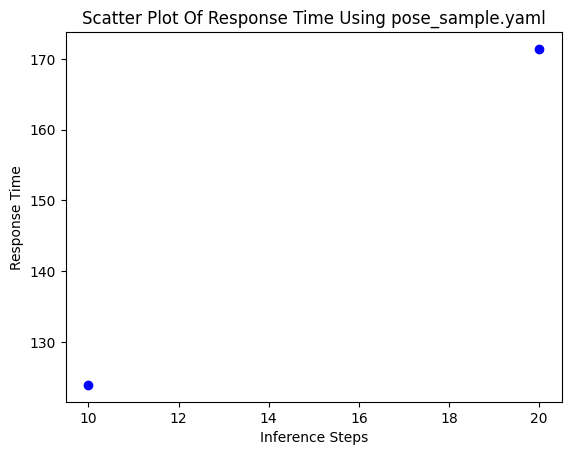

In [ ]:
%cd /content/ict3104-team14-2023/testing/{trimmed_selected_model}

import pandas as pd
import random
import matplotlib.pyplot as plt

df = pd.read_csv("pose_sample-responseTime.csv")

x = df["inference steps"]
y = df["response time"]

plt.scatter(x, y, label='Scatter Plot', color='blue', marker='o')

plt.xlabel('Inference Steps')
plt.ylabel('Response Time')
plt.title(f'Scatter Plot Of Response Time Using {selected_model}')